<a href="https://colab.research.google.com/github/Lavanyamargam/ds/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 21.8MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.5MB/s]


In [3]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generaators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)

In [7]:
# create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 105ms/step - loss: 1.2237 - accuracy: 0.5531 - val_loss: 0.6878 - val_accuracy: 0.5906
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.6799 - accuracy: 0.5775 - val_loss: 0.6647 - val_accuracy: 0.6356
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.7070 - accuracy: 0.5432 - val_loss: 0.6926 - val_accuracy: 0.5046
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.6968 - accuracy: 0.4975 - val_loss: 0.6918 - val_accuracy: 0.5072
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6930 - accuracy: 0.5031 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 0.6928 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.6930 - accuracy: 0.4999 - val_loss: 0.6945 - val_acc

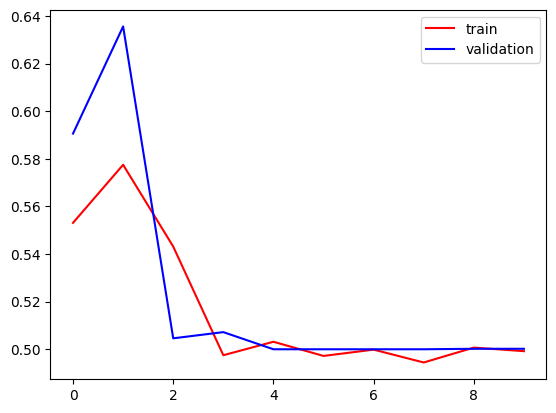

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



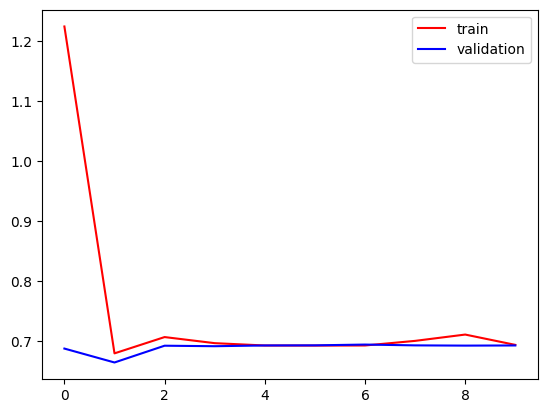

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

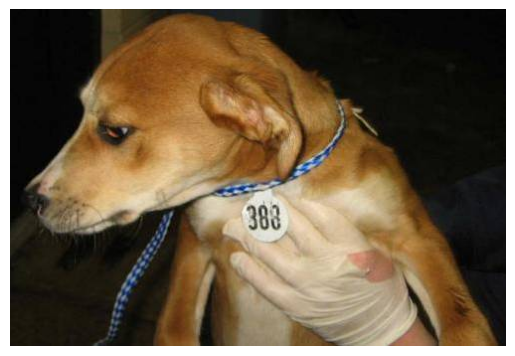

In [23]:
import cv2
import matplotlib.pyplot as plt

# Read the image
test_img = cv2.imread('/content/test/dogs/dog.10006.jpg')

# Check if the image was loaded successfully
if test_img is None:
    print("Error: The image could not be loaded. Please check the file path.")
else:
    # Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(test_img_rgb)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

In [24]:
test_img.shape

(339, 499, 3)

In [25]:
test_img=cv2.resize(test_img,(256,256))

In [26]:
test_input=test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 401ms/step


array([[0.5028483]], dtype=float32)

In [28]:
import cv2

In [29]:
test_img=cv2.imread('/content/test/cats/cat.10001.jpg')

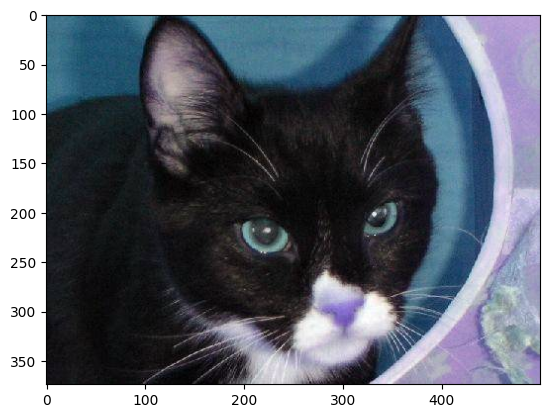

In [30]:
plt.imshow(test_img)

In [31]:
test_img.shape

(374, 500, 3)

In [33]:
test_img=cv2.resize(test_img,(256,256))

In [34]:
test_input=test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.5028483]], dtype=float32)